## Solving a Second-Order ODE Using `solve_ivp`

We want to solve the second-order differential equation:

$$
\frac{d^2y}{dt^2} = -4y
$$

This is a classic harmonic oscillator.

---

### Step 1: Convert to a System of First-Order ODEs

Let:

- $y_1 = y$
- $y_2 = \frac{dy}{dt}$

Then:

$$
\frac{dy_1}{dt} = y_2, \\
\frac{dy_2}{dt} = -4y_1
$$


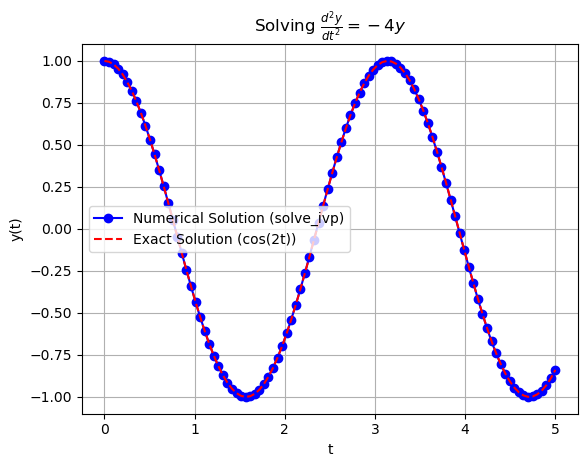

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the second-order ODE as a system of first-order ODEs
def second_order_ode(t, y):
    y1, y2 = y # y is a 2-tuple vector. y is just a variable that holds these 2 values when this function is called  
               # y1 = y, y2 = dy/dt 
    
    dy1dt = y2
    dy2dt = -4 * y1  # from d²y/dt² = -4y
    return [dy1dt, dy2dt]

# Initial conditions: y(0) = 1, y'(0) = 0
y0 = [1, 0]

# Time span
t_span = (0, 5)
NUMBER_OF_POINTS = 100
t_eval = np.linspace(*t_span, NUMBER_OF_POINTS)

# Solve the ODE system
solution = solve_ivp(second_order_ode, t_span, y0, t_eval=t_eval)

# Exact solution for comparison: y(t) = cos(2t)
y_exact = np.cos(2 * t_eval)

# Plot results
plt.plot(solution.t, solution.y[0], 'bo-', label='Numerical Solution (solve_ivp)')
plt.plot(t_eval, y_exact, 'r--', label='Exact Solution (cos(2t))')

plt.xlabel('t')
plt.ylabel('y(t)')
plt.title(r"Solving $\frac{d^2y}{dt^2} = -4y$")
plt.legend()
plt.grid(True)
plt.show()
